In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from transformers import GPT2TokenizerFast
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import ConversationalRetrievalChain
from langchain.llms import Ollama


In [ ]:
pdf_path = "" #path to your pdf

In [3]:
loader = PyPDFLoader(pdf_path)
pages = loader.load_and_split()
print(pages[0])

page_content='A Comprehensive Overview of Large Language Models
Humza Naveeda, Asad Ullah Khanb,∗, Shi Qiuc,∗, Muhammad Saqibd,e,∗, Saeed Anwarf,g, Muhammad Usmanf,g, Naveed Akhtarh,j,
Nick Barnesi, Ajmal Mianj
aThe University of Sydney, Sydney, Australia
bUniversity of Engineering and Technology (UET), Lahore, Pakistan
cThe Chinese University of Hong Kong (CUHK), HKSAR, China
dUniversity of Technology Sydney (UTS), Sydney, Australia
eCommonwealth Scientific and Industrial Research Organisation (CSIRO), Sydney, Australia
fKing Fahd University of Petroleum and Minerals (KFUPM), Dhahran, Saudi Arabia
gSDAIA-KFUPM Joint Research Center for Artificial Intelligence (JRCAI), Dhahran, Saudi Arabia
hThe University of Melbourne (UoM), Melbourne, Australia
iAustralian National University (ANU), Canberra, Australia
jThe University of Western Australia (UWA), Perth, Australia
Abstract
Large Language Models (LLMs) have recently demonstrated remarkable capabilities in natural language processing tas

In [4]:
chunks = pages


In [5]:
import PyPDF2

In [6]:
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

In [7]:
text = extract_text_from_pdf(pdf_path)

In [8]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")

In [9]:
def count_tokens(text: str) -> int:
    return len(tokenizer.encode(text))

In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=24,
    length_function=count_tokens,
)

In [11]:
chunks = text_splitter.create_documents([text])

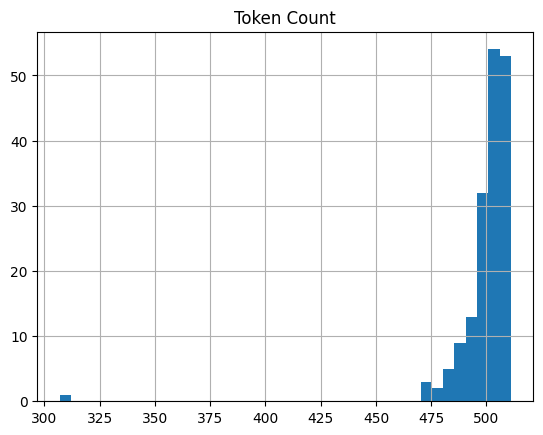

In [12]:
token_counts = [count_tokens(chunk.page_content) for chunk in chunks]
df = pd.DataFrame({'Token Count': token_counts})
df.hist(bins=40)
plt.show()

In [13]:
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
db = FAISS.from_documents(chunks, embeddings)

C:\Users\kshit\AppData\Local\Temp\ipykernel_13984\2730809270.py:1: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [14]:
query = "What are Large Language Models?"
docs = db.similarity_search(query)
print(docs[0])

page_content='A Comprehensive Overview of Large Language Models
Humza Naveeda, Asad Ullah Khanb,∗, Shi Qiuc,∗, Muhammad Saqibd,e,∗, Saeed Anwarf,g, Muhammad Usmanf,g, Naveed Akhtarh,j,
Nick Barnesi, Ajmal Mianj
aThe University of Sydney, Sydney, Australia
bUniversity of Engineering and Technology (UET), Lahore, Pakistan
cThe Chinese University of Hong Kong (CUHK), HKSAR, China
dUniversity of Technology Sydney (UTS), Sydney, Australia
eCommonwealth Scientific and Industrial Research Organisation (CSIRO), Sydney, Australia
fKing Fahd University of Petroleum and Minerals (KFUPM), Dhahran, Saudi Arabia
gSDAIA-KFUPM Joint Research Center for Artificial Intelligence (JRCAI), Dhahran, Saudi Arabia
hThe University of Melbourne (UoM), Melbourne, Australia
iAustralian National University (ANU), Canberra, Australia
jThe University of Western Australia (UWA), Perth, Australia
Abstract
Large Language Models (LLMs) have recently demonstrated remarkable capabilities in natural language processing tas

In [15]:
llm = Ollama(model="mistral")


C:\Users\kshit\AppData\Local\Temp\ipykernel_13984\3433403578.py:1: LangChainDeprecationWarning: The class `Ollama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import OllamaLLM``.
  llm = Ollama(model="mistral")


In [16]:
qa = ConversationalRetrievalChain.from_llm(llm, db.as_retriever())

In [17]:
from IPython.display import display
import ipywidgets as widgets


In [18]:
chat_history = []


In [19]:
def on_submit(_):
    query = input_box.value
    input_box.value = ""

    if query.lower() == 'exit':
        print("Thank you for using the chatbot!")
        return
    
    result = qa({"question": query, "chat_history": chat_history})
    chat_history.append((query, result['answer']))
    
    display(widgets.HTML(f'<b>User:</b> {query}'))
    display(widgets.HTML(f'<b><font color="blue">Chatbot:</font></b> {result["answer"]}'))


In [ ]:
print("Welcome to the Transformers chatbot! Type 'exit' to stop.")

input_box = widgets.Text(placeholder='Please enter your question:')
input_box.on_submit(on_submit)

display(input_box)


Welcome to the Transformers chatbot! Type 'exit' to stop.


C:\Users\kshit\AppData\Local\Temp\ipykernel_13984\1043220898.py:4: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  input_box.on_submit(on_submit)


Text(value='', placeholder='Please enter your question:')

C:\Users\kshit\AppData\Local\Temp\ipykernel_13984\481638371.py:9: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = qa({"question": query, "chat_history": chat_history})
